<a href="https://colab.research.google.com/github/KiratSinghWalia/LSTMautoencoder/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving data (5) (1) (1) (1) (1).xlsx to data (5) (1) (1) (1) (1).xlsx


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('data (5) (1) (1) (1) (1).xlsx',sheet_name=0)
column_names = list(df.columns)
for i in range(1,len(column_names)):
  df=df[pd.to_numeric(df[column_names[i]],errors='coerce').notnull()]
  df[column_names[i]]=df[column_names[i]].astype(float)
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
<ipython-input-162-79d88f33adc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_names[i]]=df[column_names[i]].astype(float)
<ipython-input-162-79d88f33adc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_names[i]]=df[column_names[i]].astype(float)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
des=df.loc[:,df.columns!='time'].describe()
print(des)

       Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
count           376124.000000          376124.000000   
mean               727.387946             750.828429   
std                328.634044             350.922335   
min                  0.000000            -185.000000   
25%                856.280000             867.660000   
50%                882.380000             913.360000   
75%                901.120000             943.660000   
max               1157.630000            1375.000000   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
count             376124.000000       376124.000000            376124.000000   
mean                -177.830733         -164.582678               715.798475   
std                   99.138694           90.096403               325.316433   
min                 -456.660000         -459.310000                13.790000   
25%                 -247.190000         -226.770000               802.040000   
50%            

In [ ]:
#train-test split
splitvalue=df['Cyclone_Outlet_Gas_draft'].count().item()
mv=int(.75*splitvalue)
Train_data=df[:mv]
Test_data=df[mv:]

Train_data.shape, Test_data.shape

((282093, 7), (94031, 7))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in range(1,len(column_names)):
  Train_data[column_names[i]]=scaler.fit_transform(Train_data[column_names[i]].values.reshape(-1,1))
  Test_data[column_names[i]]=scaler.fit_transform(Test_data[column_names[i]].values.reshape(-1,1))


<ipython-input-8-8210661015ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data[column_names[i]]=scaler.fit_transform(Train_data[column_names[i]].values.reshape(-1,1))
<ipython-input-8-8210661015ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data[column_names[i]]=scaler.fit_transform(Test_data[column_names[i]].values.reshape(-1,1))
<ipython-input-8-8210661015ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [ ]:
Train_data.drop(columns=['time'],inplace=True)
Test_data.drop(columns=['time'],inplace=True)

<ipython-input-9-9f5f2b7bb31b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data.drop(columns=['time'],inplace=True)
<ipython-input-9-9f5f2b7bb31b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data.drop(columns=['time'],inplace=True)


In [ ]:
#Train_data=torch.tensor(Train_data.to_numpy(), dtype=torch.float32)
Test_data=torch.tensor(Test_data.to_numpy(), dtype=torch.float32)
Train_data=torch.tensor(Train_data.to_numpy(), dtype=torch.float32)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import random
sample_size=288

def get_baches(split):
  data= Train_data if split == 'train' else Test_data
  ix=random.randint(0,len(data)-sample_size-1)
  x=data[ix:ix+sample_size]
  #y=data[ix+sample_size+1]
  x=x.to(device)
  x=x.unsqueeze(0)
  y=x
  return x,y

x,y=get_baches('test')
print(x.shape)

torch.Size([1, 288, 6])


In [ ]:
class Encoder(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=128):
    super(Encoder, self).__init__()
    self.seq_len, self.n_features = seq_len, n_features
    self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
    self.rnn1 = nn.LSTM(
      input_size=n_features,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    self.rnn2 = nn.LSTM(
      input_size=self.hidden_dim,
      hidden_size=embedding_dim,
      num_layers=1,
      batch_first=True
    )
  def forward(self, x):
    x = x.reshape((1, self.seq_len, self.n_features))
    x, (_, _) = self.rnn1(x)
    x, (hidden_n, _) = self.rnn2(x)
    return hidden_n.reshape((1, self.embedding_dim)),x

In [ ]:
class Decoder(nn.Module):
  def __init__(self, seq_len, input_dim=128, n_features=6):
    super(Decoder, self).__init__()
    self.seq_len, self.input_dim = seq_len, input_dim
    self.hidden_dim, self.n_features = 2 * input_dim, n_features
    self.rnn1 = nn.LSTM(
      input_size=input_dim,
      hidden_size=input_dim,
      num_layers=1,
      batch_first=True
    )
    self.rnn2 = nn.LSTM(
      input_size=input_dim,
      hidden_size=self.hidden_dim,
      num_layers=1,
      batch_first=True
    )
    self.output_layer = nn.Linear(self.hidden_dim, n_features)
  def forward(self, x):

    x = x.unsqueeze(1).tile((1, self.seq_len, 1))
    x, (hidden_n, cell_n) = self.rnn1(x)
    x, (hidden_n, cell_n) = self.rnn2(x)
    x = x.reshape((self.seq_len, self.hidden_dim))

    return self.output_layer(x)

In [ ]:
class LSTMAutoencoder(nn.Module):
  def __init__(self, seq_len, n_features, embedding_dim=128):
    super(LSTMAutoencoder, self).__init__()
    self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
    self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)
  def forward(self, x):
    hidden_n, _ = self.encoder(x)
    x = self.decoder(hidden_n)
    return x

In [ ]:
@torch.no_grad()
def estimate_loss():
  out={}
  model.eval()
  for split in ['train','val']:
    losses=torch.zeros(eval_iters)
    for i in range(eval_iters):
      x,y=get_baches(split)
      predictions=model(x)
      predictions=predictions.unsqueeze(0)
      loss=nn.MSELoss().to(device)
      loss=loss(predictions,y)
      losses[i]=loss.item()
    out[split]=losses.mean()
  model.train()
  return out

In [ ]:
seq_len=288
n_features=6
model=LSTMAutoencoder(seq_len,n_features).to(device)




In [ ]:
iterations=5000
eval_iters = 100
optimizer=optim.Adam(model.parameters(),lr=1e-3)
for iter in range(iterations):
  if iter % eval_iters == 0 or iter == iterations-1:
    loss=estimate_loss()
    print(f"step: {iter}, train loss: {loss['train']:.3f}, val loss: {loss['val']:.3f}")

  Xb,Yb=get_baches('train')
  predictions=model(Xb)
  predictions=predictions.unsqueeze(0)
  loss=nn.MSELoss().to(device)
  loss=loss(predictions,Yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()
  loss=loss.item()



step: 0, train loss: 1.082, val loss: 0.978
step: 100, train loss: 0.297, val loss: 0.094
step: 200, train loss: 0.329, val loss: 0.222
step: 300, train loss: 0.322, val loss: 0.144
step: 400, train loss: 0.371, val loss: 0.128
step: 500, train loss: 0.258, val loss: 0.194
step: 600, train loss: 0.344, val loss: 0.147
step: 700, train loss: 0.169, val loss: 0.186
step: 800, train loss: 0.295, val loss: 0.221
step: 900, train loss: 0.246, val loss: 0.187
step: 1000, train loss: 0.152, val loss: 0.175
step: 1100, train loss: 0.218, val loss: 0.099
step: 1200, train loss: 0.184, val loss: 0.084
step: 1300, train loss: 0.210, val loss: 0.196
step: 1400, train loss: 0.310, val loss: 0.136
step: 1500, train loss: 0.168, val loss: 0.092
step: 1600, train loss: 0.215, val loss: 0.132
step: 1700, train loss: 0.203, val loss: 0.168
step: 1800, train loss: 0.203, val loss: 0.261
step: 1900, train loss: 0.182, val loss: 0.216
step: 2000, train loss: 0.265, val loss: 0.299
step: 2100, train loss: 0

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
#threshold
def predict(model,split):
  losses = []
  with torch.no_grad():
    model = model.eval()
    for i in range(500):
      x,y=get_baches(split)
      predictions=model(x)
      predictions=predictions.unsqueeze(0)
      loss=nn.MSELoss().to(device)
      loss=loss(predictions,y)
      losses.append(loss.item())
  return losses

In [ ]:
losses=predict(model,'val')

<ipython-input-51-2cb2be6128af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(losses, bins=50, kde=True);


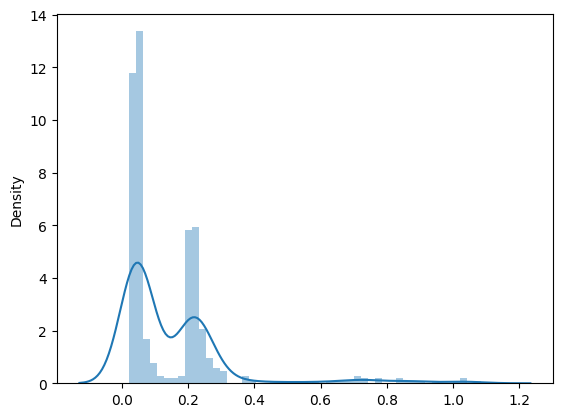

In [ ]:
!pip install seaborn
import seaborn as sns
sns.distplot(losses, bins=50, kde=True);


In [ ]:
def predict(model,split):
  losses_features = [[] for _ in range(6)]
  num_iterations=500
  with torch.no_grad():
    model = model.eval()
    for i in range(500):
      x,y=get_baches(split)
      predictions=model(x)
      predictions=predictions.unsqueeze(0)
      for feature_idx in range(6):
        prediction_feature = predictions[:, :, feature_idx]
        actual_feature = y[:, :, feature_idx]
        loss=nn.MSELoss().to(device)
        loss=loss(prediction_feature,actual_feature)
        losses_features[feature_idx].append(loss.item())
  return losses_features


In [ ]:
losses=predict(model,'val')

In [ ]:
variable1,variable2,variable3,variable4,variable5,variable6=losses

<ipython-input-107-fd75667be007>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(i, bins=50, kde=True);
<ipython-input-107-fd75667be007>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(i, bins=50, kde=True);
<ipython-input-107-fd75667be007>:5: UserWarning: 

`distplot` is a deprecated function

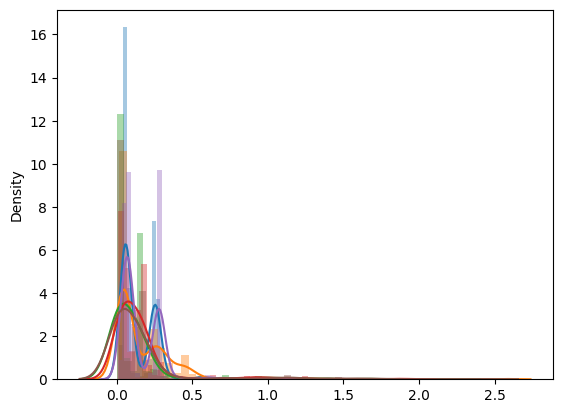

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in losses:
  sns.distplot(i, bins=50, kde=True);


In [ ]:
Threshold=.7
count =0
total=0
for i in losses:
  for j in i:
    total+=1
    if j>Threshold:
      count+=1

print(total,count)

3000 85


In [ ]:
Threshold=0.7

In [ ]:
for i in range(1,len(column_names)):
  df[column_names[i]]=scaler.fit_transform(df[column_names[i]].values.reshape(-1,1))


In [ ]:
df_replica = df.copy()


In [ ]:
df = df.iloc[:-284]

In [ ]:
df.drop(columns=['time'],inplace=True)

In [ ]:
df_raw_tensor=torch.tensor(df.to_numpy(), dtype=torch.float32).to(device)

In [ ]:
chunk_size = 288
chunks = [df.iloc[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

In [ ]:
tensor_list = []
index=0
for i in chunks:
  with torch.no_grad():
    x=torch.tensor(i.to_numpy(), dtype=torch.float32).to(device)
    predictions=model(x)
    predictions=predictions.unsqueeze(0)
    tensor_list.append(predictions)
    index+=1
    if index % 500 == 0 :
      print(f'{index} rows processed')

final_tensor = torch.cat(tensor_list, dim=1)

500 rows processed
1000 rows processed


In [ ]:
df_raw_tensor=df_raw_tensor.unsqueeze(0)

In [ ]:
final_tensor.shape,df_raw_tensor.shape

(torch.Size([1, 375840, 6]), torch.Size([1, 1, 375840, 6]))

In [ ]:
mse_tensor = (df_raw_tensor-final_tensor) ** 2


In [ ]:
mse_tensor=mse_tensor.squeeze(0)


In [ ]:
numpy_array = mse_tensor.cpu().numpy()
df_last = pd.DataFrame(numpy_array, columns=[f"Column_{i}" for i in range(numpy_array.shape[1])])

print(df_last.head())

   Column_0  Column_1  Column_2  Column_3  Column_4  Column_5
0  0.112204  0.137096  0.016092  0.035024  0.112467  0.006736
1  0.079346  0.095803  0.001343  0.012642  0.074009  0.007790
2  0.038335  0.064179  0.000786  0.007762  0.039986  0.000174
3  0.019262  0.037530  0.005520  0.000229  0.018619  0.005258
4  0.022489  0.034079  0.009813  0.001620  0.015235  0.007537


In [ ]:
count = (df_last >Threshold).sum().sum()
print(f"Number of elements greater than threshold: {count}")

Number of elements greater than threshold: 87777


In [ ]:
df_image = df_replica.iloc[:-284]



0

In [ ]:

df_last_with_time = df_last


In [ ]:
column_to_add=df_image['time']
df_last_with_time.insert(0, 'time', column_to_add)

In [ ]:
df_for_test=df_last_with_time

In [ ]:
df_for_test['Row Mean'] = df_for_test.mean(axis=1)



In [ ]:
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Row Mean
count,375840.000000,375840.000000,375840.000000,375840.000000,375840.000000,375840.000000,375840.000000
mean,-0.000375,-0.000331,0.000369,0.000291,-0.000409,0.000346,-0.000018
std,1.000285,1.000306,1.000287,1.000317,1.000268,1.000297,0.212736
min,-2.213371,-2.666771,-2.812521,-3.271248,-2.157928,-3.286462,-1.092098
25%,0.392054,0.332721,-0.699821,-0.690454,0.263994,-0.672859,-0.142294
50%,0.471595,0.463213,-0.377041,-0.377122,0.478555,-0.362330,-0.036515
75%,0.528650,0.549557,0.078483,0.234113,0.564041,0.065583,0.107044
max,1.309185,1.778663,2.199959,7.252715,2.026342,2.357317,1.711591


In [ ]:
df_for_test['above_threshold'] = df_for_test['Row Mean'] > Threshold

In [ ]:
df_for_test = df_for_test.reset_index()
df_for_test.to_excel('output.xlsx', index=False)

print("DataFrame successfully exported to 'output.xlsx'")

DataFrame successfully exported to 'output.xlsx'


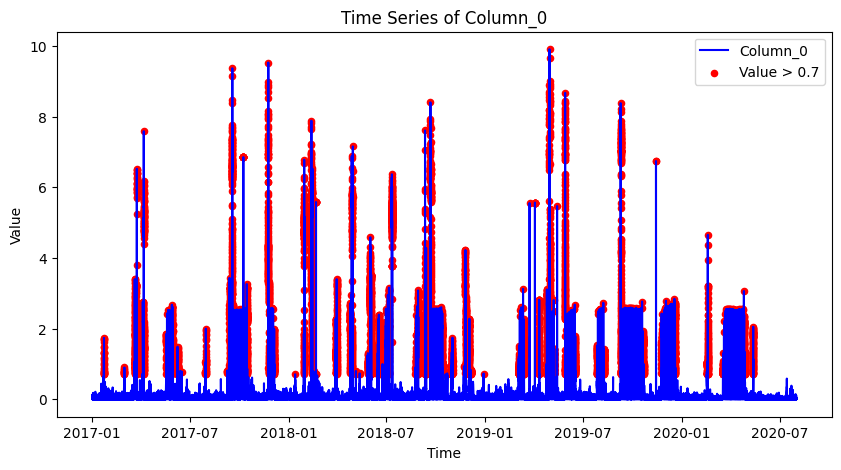

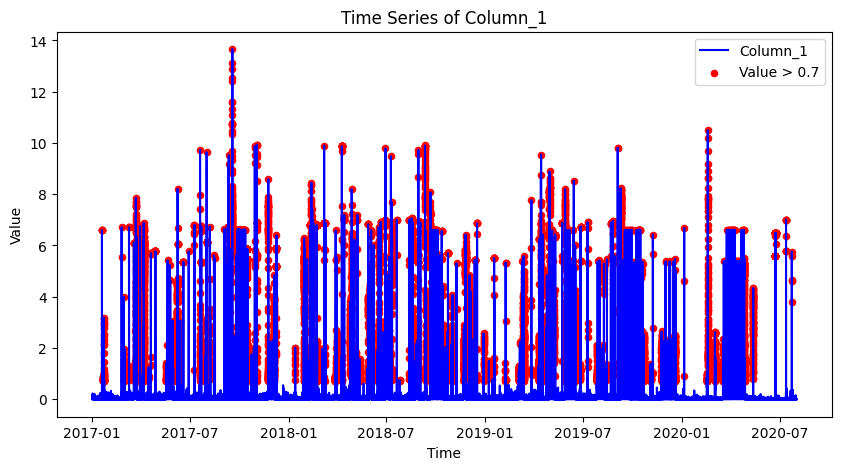

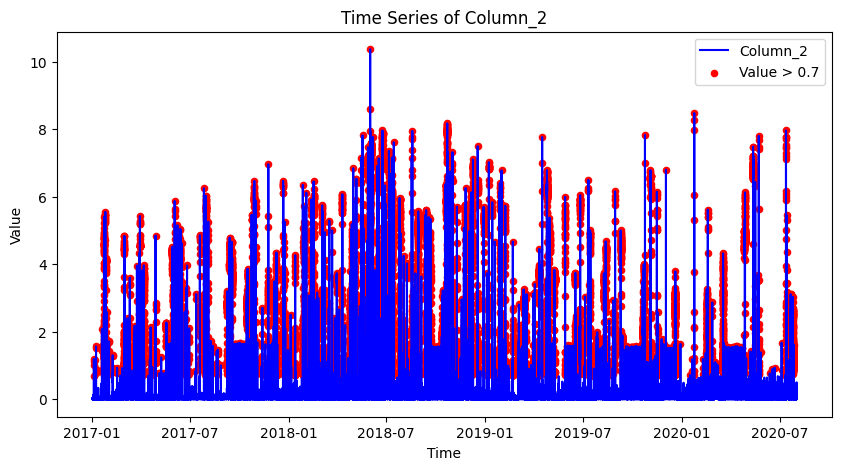

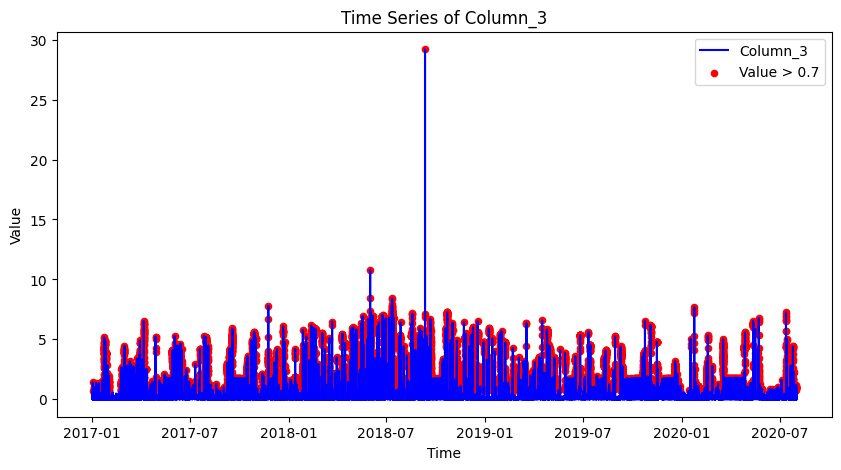

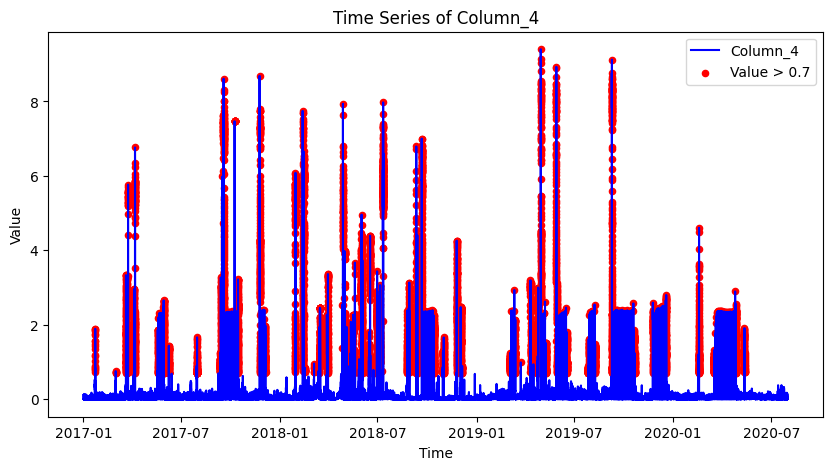

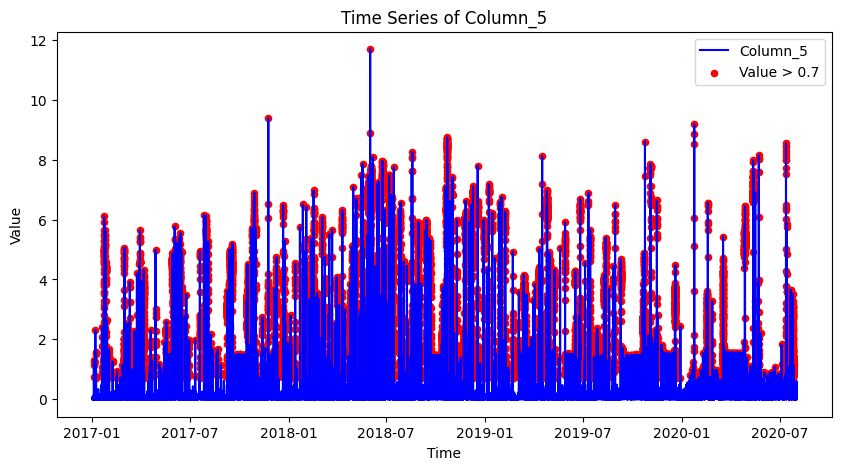

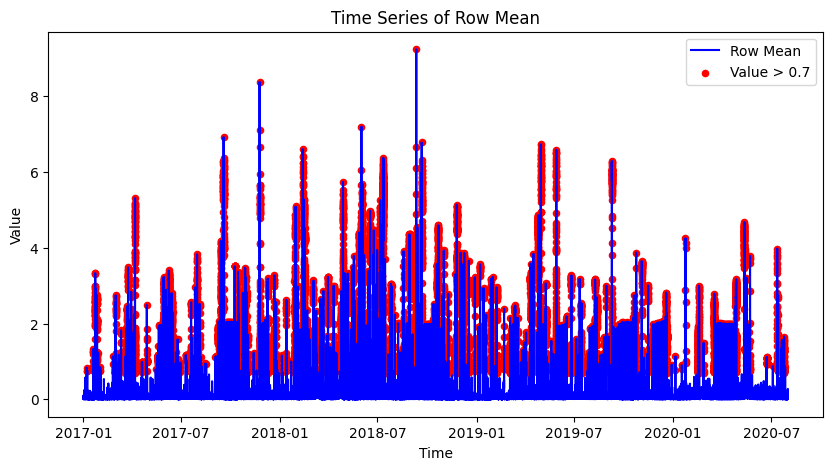

In [ ]:

for column in df_for_test.columns:
    plt.figure(figsize=(10, 5))

    # Plot the time series line
    plt.plot(df_for_test.index, df_for_test[column], label=column, color='blue')

    # Highlight points where the value > threshold
    above_threshold_values = df_for_test[df_for_test[column] > Threshold]
    plt.scatter(above_threshold_values.index, above_threshold_values[column], color='red', label=f'Value > {Threshold}', s=20)

    # Add title and labels
    plt.title(f"Time Series of {column}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()